# ACME: Numerical Differentiation 

Problem 1

Write a function that defines f (x) = (sin(x) + 1)^sin(cos(x)) and takes its symbolic derivative with respect to x using SymPy. Lambdify the resulting function so that it can accept NumPy arrays and return the resulting function handle.
To check your function, plot f and its derivative f′ over the domain [−π,π]. It may be helpful to move the bottom spine to 0 so you can see where the derivative crosses the x-axis.

In [114]:
from matplotlib import pyplot as plt
import sympy as sy
import numpy as np
import pandas as pd

x = sy.symbols('x')

In [129]:
#Original function
f_x = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
f_x1 = sy.lambdify(x,f_x)

#Derivative
f_prime = sy.diff(f_x)
f_prime1 = sy.lambdify(x, f_prime)

In [87]:
points = np.arange(-3.14,3.14)

numpy.ndarray

In [4]:
f_prime1(points)
f_x1(points)

array([1.00134214, 2.5807851 , 0.37890804, 0.88190968, 1.40842419,
       0.82769883, 0.81794686])

(0, 3)

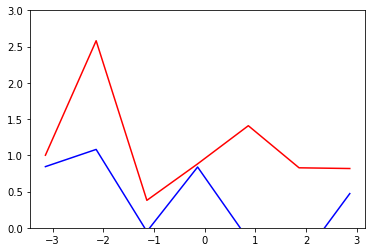

In [5]:
plt.plot(points, f_x1(points), 'r', label = 'Orig')
plt.plot(points, f_prime1(points), 'b', label = 'Deriv')
plt.ylim(0, 3)

Problem 2

Write a function for each of the finite difference quotients listed in Table 8.1. Each function should accept a function handle f, an array of points x, and a float h; each should return an array of the difference quotients evaluated at each point in x.
To test your functions, approximate the derivative of f (x) = (sin(x) + 1)sin(cos(x)) at each point of a domain over [−π, π]. Plot the results and compare them to the results of Problem 1.



In [107]:
f_forward1 = lambda f,x,h: (f(x+h)-f(x))/h
f_forward2 = lambda f,x,h: (-3*f(x)+4*f(x+h)-f(x+h))/ (2*h)
f_back1 = lambda f,x,h: (f(x)-f(x-h))/h
f_back2 = lambda f,x,h: (3*f(x)- 4*f(x-h)+f(x-2*h))/(2*h)
f_center1 = lambda f,x,h: (f(x+h)-f(x-h))/(2*h)
f_center2 = lambda f,x,h: (f(x-2*h)- 8*f(x-h)+ 8*f(x+h)-f(x+2*h))/(12*h)

In [105]:
h=.000001
f_forward1(f_x1,points,h)
f_forward2(f_x1,points,h)
f_back1(f_x1,points,h)
f_back2(f_x1,points,h)
f_center1(f_x1,points,h)
f_center2(f_x1,points,h)

TypeError: <lambda>() takes 2 positional arguments but 3 were given

(0, 3)

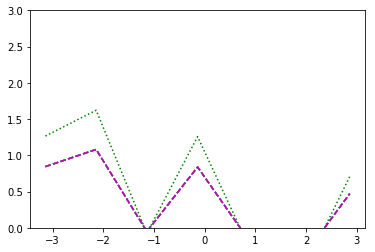

In [8]:
plt.plot(points, f_forward1(f_x1,points,h), 'r--')
plt.plot(points, f_forward2(f_x1,points,h), 'g:')
plt.plot(points, f_back1(f_x1,points,h), 'b----')
plt.plot(points, f_back2(f_x1,points,h), 'y----')
plt.plot(points, f_center1(f_x1,points,h), 'c:')
plt.plot(points, f_center2(f_x1,points,h), 'm--')

plt.ylim(0, 3)

Problem 3


Write a function that accepts a point x0 at which to compute the derivative of f(x) = (sin(x) + 1)^sin(cos(x)). Use your function from Problem 1 to compute the exact value of f′(x0). Then use each your functions from Problem 2 to get an approximate derivative f ̃′(x0) for h = 10^−8,10^−7,...,10^−1,1. Track the absolute error |f′(x0) − f ̃′(x0)| for each trial, then plot the absolute error against h on a log-log scale (use plt.loglog()).
Instead of using np.linspace() to create an array of h values, use np.logspace(). This function generates logarithmically spaced values between two powers of 10.

In [9]:
hpoints = np.logspace(-7, 0, 8) 
hpoints

array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [10]:
#Real f'(x) at x=1
xk=1
f_prime1(xk)

-0.3965403874194624

In [11]:
f_forward1(f_x1,xk,hpoints)

array([-0.39654046, -0.39654116, -0.39654808, -0.39661733, -0.39730945,
       -0.40419196, -0.4687854 , -0.59904239])

In [12]:
def get_diff(f):
    diff_list=[]
    for i in f(f_x1,xk,hpoints):
        a = abs(i-f_prime1(xk))
        diff_list.append(a)
    return diff_list

In [13]:
get_diff(f_forward1)

[7.748920549666138e-08,
 7.693801944430589e-07,
 7.694840399696812e-06,
 7.694447531503279e-05,
 0.0007690585267188244,
 0.00765157071879341,
 0.07224501706561681,
 0.20250200030554089]

Text(0.5, 0, 'h')

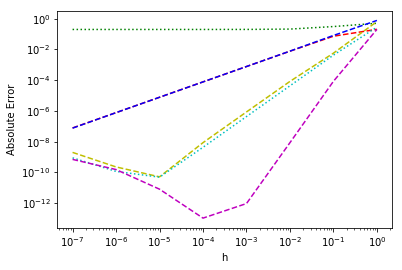

In [14]:
fig, ax = plt.subplots(1,1)
plt.plot(hpoints, get_diff(f_forward1), 'r--')
plt.plot(hpoints, get_diff(f_forward2), 'g:')
plt.plot(hpoints, get_diff(f_back1), 'b----')
plt.plot(hpoints, get_diff(f_back2), 'y----')
plt.plot(hpoints, get_diff(f_center1), 'c:')
plt.plot(hpoints, get_diff(f_center2), 'm--')

plt.loglog()
ax.set_ylabel('Absolute Error')
ax.set_xlabel('h')

Problem 4

The radar stations A and B, separated by the distance a = 500 m, track a plane C by recording the angles α and β at one-second intervals. Your goal, back at air traffic control, is to determine the speed of the plane.

Let the position of the plane at time t be given by (x(t), y(t)). The speed at time t is the magnitude of the velocity vector, ∥ d (x(t), y(t))∥ = 􏰇x′(t)2 + y′(t)2. The closed forms of the
dt
functions x(t) and y(t) are unknown (and may not exist at all), but we can still use numerical methods to estimate x′(t) and y′(t). For example, at t = 3, the second order centered difference quotient for x′(t) is
x′(3)≈ x(3+h)−x(3−h) = 1(x(4)−x(2)). 2h 2

In this case h = 1 since data comes in from the radar stations at 1 second intervals. Successive readings for α and β at integer times t = 7,8,...,14 are stored in the file plane.npy. Each row in the array represents a different reading; the columns are the observation time t, the angle α (in degrees), and the angle β (also in degrees), in that order. 
The Cartesian coordinates of the plane can be calculated from the angles α and β as follows.
x(α,β)=a tan(β) y(α,β)=a tan(β)tan(α) (8.4)

Load the data, convert α and β to radians, then compute the coordinates x(t) and y(t) at each given t using 8.4. Approximate x′(t) and y′(t) using a forward difference quotient for t = 7, a backward difference quotient for t = 14, and a centered difference quotient for t = 8, 9, . . . , 13 (see Figure 8.1). Return the values of the speed 􏰇x′(t)2 + y′(t)2 at each t.a
(Hint: np.deg2rad() will be helpful.)

In [198]:
times = np.load('plane.npy')
times

array([[ 7.  , 56.25, 67.54],
       [ 8.  , 55.53, 66.57],
       [ 9.  , 54.8 , 65.59],
       [10.  , 54.06, 64.59],
       [11.  , 53.34, 63.62],
       [12.  , 52.69, 62.74],
       [13.  , 51.94, 61.72],
       [14.  , 51.28, 60.82]])

In [199]:
rads_a = np.deg2rad(times[:, 1])
rads_b = np.deg2rad(times[:, 2])

times[:,1]=rads_a
times[:,2]=rads_b

In [200]:
def x_cords():
    xlist = []
    for i,j in zip(times[:,1],times[:,2]):
        y = 500*((sy.tan(j))/(sy.tan(j)-sy.tan(i)))
        xlist.append(y)
    return xlist

In [201]:
def y_cords():
    ylist=[]
    for i,j in zip(times[:,1],times[:,2]):
        y = 500*((sy.tan(i)*sy.tan(j))/(sy.tan(j)-sy.tan(i)))
        ylist.append(y)
    return ylist

In [210]:
coords = [[a,b,c] for a,b,c in zip(times[:,0],x_cords(),y_cords())]

df = pd.DataFrame(coords, columns=['T','Xco','Yco'])
df

,T,Xco,Yco
0,7.0,1311.27133660144,1962.45623877580
1,8.0,1355.93647620127,1975.11450516313
2,9.0,1401.91839832001,1987.34601606186
3,10.0,1450.49700629409,2000.84071299288
4,11.0,1498.64035029130,2013.51241079397
5,12.0,1543.79895461496,2025.79223350439
6,13.0,1598.04138183033,2040.99058265381
7,14.0,1647.59609290594,2055.06557068017


In [212]:
x_dict = dict(zip(df['T'], df['Xco']))
y_dict = dict(zip(df['T'], df['Yco']))

In [213]:
x_prime_list = []
y_prime_list = []

At T=7, using (f(x+h)-f(x))/h

In [214]:
def ff1(t,h,dict):
    a = (dict[t+h]-dict[t])/(h)
    return a

In [215]:
x_prime_7 = ff1(7,1,x_dict)
x_prime_list.append(x_prime_7)

In [216]:
y_prime_7 = ff1(7,1,y_dict)
y_prime_list.append(y_prime_7)

At T=8 to T=13, using (f(x+h)-f(x-h))/(2*h)

In [218]:
def fc1_x(t,h,dict):
    a = (dict[t+h]-dict[t-h])/(2*h)
    x_prime_list.append(a)

def fc1_y(t,h,dict):
    a = (dict[t+h]-dict[t-h])/(2*h)
    y_prime_list.append(a)

In [219]:
for i in range(8,14):
    fc1_x(i,1,x_dict)
    
for i in range(8,14):
    fc1_y(i,1,y_dict)

At T=14, using (f(x)-f(x-h))/h

In [226]:
def fb1(t,h,dict):
    a = (dict[t]-dict[t-h])/(h)
    return a

In [228]:
x_prime_14 = fb1(14,1,x_dict)
x_prime_list.append(x_prime_14)

y_prime_14 = fb1(14,1,y_dict)
y_prime_list.append(y_prime_14)

In [234]:
x_prime_dict = dict(zip(df['T'],x_prime_list))
y_prime_dict = dict(zip(df['T'],y_prime_list))

In [241]:
speeds = []
def get_speed(t):
    a = (((x_prime_dict[t])**2) + ((y_prime_dict[t])**2))**.5
    speeds.append(a)
    return speeds

In [242]:
for i in range (7,15):
    get_speed(i)

speeds

[46.4242006221342,
 47.0010393809530,
 48.9988051403680,
 50.0994416296528,
 48.2903508382046,
 51.5645590492726,
 53.9230335450534,
 51.5148005696357]

Problem 5 

Write a function that accepts a function f : Rn → Rm, a point x0 ∈ Rn, and a float h. Approximate the Jacobian matrix of f at x using the second order centered difference quotient in (8.5).
(Hint: the standard basis vector ej is the jth column of the n × n identity matrix I.)
To test your function, define a simple function like f(x,y) = [x2,x3 − y]T where the Jacobian is easy to find analytically, then check the results of your function against SymPy or your own scratch work.